# Call colocation of IS2 and TOPAZ

draft for: /pyroutine/run_colocate_IS_TP.py

In [1]:
import datetime
from src.data_preparation import colocate_IS_TP

### For one track

In [2]:
day = datetime.datetime(2018,10,14)  # loop on days
    
co = colocate_IS_TP.Coloc()
co.import_IS2(day=day, ntrack=0)  # loop on ntracks
co.import_TOPAZ4()
co.colocate_time()
co.colocate_profiles(nprof_threshold=1000)

Loading ICESat-2...
Colocation on IS2SITDAT4_01_20181014000347_02350101_005_02_bnum1gt3r_001.nc
> /users/edelleo1/tardis/tardis-ml/src/data_preparation/colocate_IS_TP.py(47)load_IS_nc()
     45     import pdb; pdb.set_trace()
     46 
---> 47     if return_latlon:
     48         lat = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['latitude']
     49         lon = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['longitude']

ipdb> sit_is
<xarray.DataArray 'ice_thickness' (index: 250930)>
[250930 values with dtype=float64]
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 ... 250925 250926 250927 250928 250929
Attributes:
    units:        meters
    coordinates:  along-track segment
    long_name:    Sea ice thickness from ATL10 and redistributed NESOSIM (v1....
ipdb> nc
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Description: Along track sea ice thickness estimates from ICESat-2 and ancillary data including ATL10 (rel005) freeboard

In [27]:
# for second beam
co2 = colocate_IS_TP.Coloc()
co2.import_IS2(day=day, ntrack=0, beam=2)  # loop on ntracks
co2.import_TOPAZ4(load_covar=False)
co2.colocate_time()
co2.colocate_profiles(nprof_threshold=1000)

Loading ICESat-2...
Colocation on IS2SITDAT4_01_20181014000347_02350101_005_02_bnum3gt2r_001.nc
Loading TOPAZ...
Colocating IS2 profiles...
Time "get_closest_arr_xy":   1.0403332710266113  secs
103 TOPAZ Macro pixel with ICESat-2 profiles:


In [28]:
# for third beam
co3 = colocate_IS_TP.Coloc()
co3.import_IS2(day=day, ntrack=0, beam=3)  # loop on ntracks
co3.import_TOPAZ4(load_covar=False)
co3.colocate_time()
co3.colocate_profiles(nprof_threshold=1000)

Loading ICESat-2...
Colocation on IS2SITDAT4_01_20181014000347_02350101_005_02_bnum5gt1r_001.nc
Loading TOPAZ...
Colocating IS2 profiles...
Time "get_closest_arr_xy":   1.2039105892181396  secs
109 TOPAZ Macro pixel with ICESat-2 profiles:


In [29]:
# check the 3 beams: fuse if all 3 contain same macro-pixel
co.fuse_3beams(co2, co3)

In [33]:
co.get_TP_1track()

Retrieving TOPAZ values for macro-pixels...


In [ ]:
co.save_track()

### loop on track 

In [5]:
from importlib import reload
reload(colocate_IS_TP)

<module 'src.data_preparation.colocate_IS_TP' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/colocate_IS_TP.py'>

In [1]:
import datetime
from src.data_preparation import colocate_IS_TP

In [2]:
# day = datetime.datetime(2018,10,14)  # loop on days
day = datetime.datetime(2019,9,1)  # loop on days

  
co = colocate_IS_TP.Coloc()
co.import_TOPAZ4()

Loading TOPAZ...
	Retrieve siconc
	Retrieve sisnthick
	Retrieve zos
	Retrieve vxsi
	Retrieve vysi


In [3]:
ntracks = co.get_ntracks_IS2(day=day)
if ntracks is None:
    print('No ICESat-2 track')

In [10]:
for ntrack in range(ntracks):
    print(f'\n\nWorking on track: {ntrack}')
    
    # beam 1
    co.import_IS2(day=day, ntrack=ntrack, beam=1)
    co.colocate_time()
    co.colocate_profiles(nprof_threshold=1000)
    
    # beam 2
    co2 = colocate_IS_TP.Coloc()
#     co2.import_IS2(day=day, ntrack=ntrack, beam=2)  # loop on ntracks
    err = co2.import_IS2(day=day, beam=2, name_track=co.file_is)
    if err is None:  # error (==1) if file not found
        co2.import_TOPAZ4(load_covar=False)
        co2.colocate_time()
        co2.colocate_profiles(nprof_threshold=1000)
    
    # beam 3
    co3 = colocate_IS_TP.Coloc()
#     co3.import_IS2(day=day, ntrack=ntrack, beam=3)  # loop on ntracks
    err = co3.import_IS2(day=day, beam=3, name_track=co.file_is)
    if err is None:  # error (==1) if file not found
        co3.import_TOPAZ4(load_covar=False)
        co3.colocate_time()
        co3.colocate_profiles(nprof_threshold=1000)
    
    # fuse beams
    co.fuse_3beams(co2, co3)
    
    # get TOPAZ values for the fused dictionary of macro-pixels
    co.get_TP_1track()

    # check that TOPAZ macro-pixel is not over land (SIT = nan)
    co.remove_macro_over_land()
    
    co.save_track()



Working on track: 0
Loading ICESat-2...
Colocation on IS2SITDAT4_01_20190901004029_09920401_005_02_bnum1gt1l_001.nc
Colocating IS2 profiles...
Time "get_closest_arr_xy":   7.83010721206665  secs
24 TOPAZ Macro pixel with ICESat-2 profiles:
Loading ICESat-2...
Colocation on IS2SITDAT4_01_20190901004029_09920401_005_02_bnum3gt2l_001.nc
Loading TOPAZ...
Colocating IS2 profiles...
Time "get_closest_arr_xy":   0.359527587890625  secs
21 TOPAZ Macro pixel with ICESat-2 profiles:
Loading ICESat-2...
Colocation on IS2SITDAT4_01_20190901004029_09920401_005_02_bnum5gt3l_001.nc
Loading TOPAZ...
Colocating IS2 profiles...
Time "get_closest_arr_xy":   0.40064191818237305  secs
19 TOPAZ Macro pixel with ICESat-2 profiles:
Retrieving TOPAZ values for macro-pixels...
ICESat-2 coloc profiles saved as: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ICESat2_co_TOPAZ/20190901/IS2SITDAT4_01_20190901004029_09920401_005_02_coIS2.pkl
TOPAZ4 variables saved as: /scratch/project_465000269/edelleo1/L

Loading TOPAZ...
Colocating IS2 profiles...
Time "get_closest_arr_xy":   0.13307523727416992  secs
10 TOPAZ Macro pixel with ICESat-2 profiles:
Nan in ICESat-2:  265 Nan
Nan in ICESat-2:  all NaN
Nan in ICESat-2:  all NaN
Nan in ICESat-2:  all NaN
Nan in ICESat-2:  all NaN
Nan in ICESat-2:  all NaN
Nan in ICESat-2:  all NaN
Loading ICESat-2...
Colocation on IS2SITDAT4_01_20190901100614_09980401_005_02_bnum5gt3l_001.nc
Loading TOPAZ...
Colocating IS2 profiles...
Time "get_closest_arr_xy":   0.1361093521118164  secs
11 TOPAZ Macro pixel with ICESat-2 profiles:
Nan in ICESat-2:  all NaN
Nan in ICESat-2:  all NaN
Nan in ICESat-2:  all NaN
Nan in ICESat-2:  all NaN
Nan in ICESat-2:  all NaN
Nan in ICESat-2:  all NaN
Nan in ICESat-2:  all NaN
Retrieving TOPAZ values for macro-pixels...
ICESat-2 coloc profiles saved as: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ICESat2_co_TOPAZ/20190901/IS2SITDAT4_01_20190901100614_09980401_005_02_coIS2.pkl
TOPAZ4 variables saved as: /scratch/p

Loading TOPAZ...
Colocating IS2 profiles...
Time "get_closest_arr_xy":   0.10440206527709961  secs
9 TOPAZ Macro pixel with ICESat-2 profiles:
Loading ICESat-2...
Colocation on IS2SITDAT4_01_20190901210615_10050401_005_02_bnum5gt3l_001.nc
Loading TOPAZ...
Colocating IS2 profiles...
Time "get_closest_arr_xy":   0.09705543518066406  secs
8 TOPAZ Macro pixel with ICESat-2 profiles:
Retrieving TOPAZ values for macro-pixels...
ICESat-2 coloc profiles saved as: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ICESat2_co_TOPAZ/20190901/IS2SITDAT4_01_20190901210615_10050401_005_02_coIS2.pkl
TOPAZ4 variables saved as: /scratch/project_465000269/edelleo1/Leo/SIT_observations/ICESat2_co_TOPAZ/20190901/IS2SITDAT4_01_20190901210615_10050401_005_02_coTP4.npy


SIT for TOPAZ pixel "148_45": 1.15244368777286 m
SIT averaged for ICESat-2: 1.0016812586230206 m
Histogram for 1275 profiles from ICESat-2:


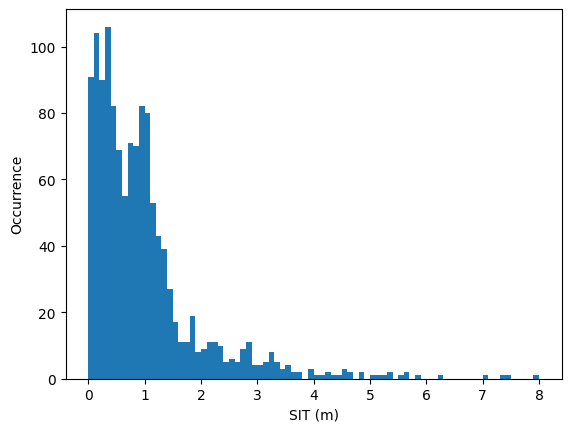

In [58]:
# co.draw_hist()

# Import colocated dataset and reshape

## also need to scale inputs

In [21]:
from importlib import reload

In [79]:
reload(coloc_dataset)

<module 'src.data_preparation.coloc_dataset' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/coloc_dataset.py'>

In [80]:
import numpy as np
import datetime
import os
import random
import pickle
from glob import glob

from src.data_preparation import coloc_dataset
from src.modelling import model_distri

import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

ml_dir = 'Leo/results/distri_ml/ml/'

# ----------------------------------------
#               Import dataset
# ----------------------------------------

# Dates to import dataset
d1 = datetime.datetime(2018, 10, 14)
d2 = datetime.datetime(2018, 10, 16) 
# d2 = datetime.datetime(2019, 4, 30) 

# ['SIT', 'month', 'lat', 'lon', 'siconc', 'sisnthick', 'zos', 'vxsi', 'vysi', 
# '2T', 'MSL', 'TP', '10V', '10U', 'SSR', 'STR', 'sia']
var_to_exclude = ['lon', 'sia']
all_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days + 1)])


ds = coloc_dataset.DatasetTrain(days=all_days, rootdir=rootdir, ml_dir=ml_dir)

ds.exclude_var(var_to_exclude=var_to_exclude)

ds.check_nan()
ds.dataset_split()
ds.assemble_dataset(scaling=True)

Importing...
	 2018-10-14
	 2018-10-15
	 2018-10-16
Variable: lon excluded
Variable: sia excluded
Size of the training set:    1199 TOPAZ pixels
Size of the validation set:   257 TOPAZ pixels
Size of the test set:         258 TOPAZ pixels
Scaling data...
Scaler saved as: /scratch/project_465000269/edelleo1/Leo/results/distri_ml/ml/ScalerMM_15feat_03.pkl
Dataset assembled


In [85]:
np.unique(ds.sp_tp[:, 1])

array([43., 44., 45.])

In [11]:
fig_dir = 'Leo/results/distri_ml/figures/'
odir= f'{rootdir}{fig_dir}'
ofile = 'loss.png'
filename = f'{odir}{ofile}'

In [20]:
midx = 0
ytrue =ds.dataset['ytest'][midx]
ypred = ytrue*10

bins_tp5 = np.array([0, 0.64, 1.39, 2.47, 4.57, 20])

import matplotlib.pyplot as plt
from src.visualization import visu_mdl_distri as vmd

In [22]:
reload(vmd)

<module 'src.visualization.visu_mdl_distri' from '/users/edelleo1/tardis/tardis-ml/src/visualization/visu_mdl_distri.py'>

In [96]:
vmd.draw_yt_yp(ytrue, ypred, showfig=False, savefig=True, odir=odir)
vmd.hist_yt_yp(ytrue, ypred, showfig=False, savefig=True, odir=odir)

vmd.hist_yt_yp_icecat(ytrue, ypred, showfig=False, savefig=True, odir=odir)

Saved as: /scratch/project_465000269/edelleo1/Leo/results/distri_ml/figures/Obs_distri1D.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distri_ml/figures/hist_distri1D.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distri_ml/figures/hist_distri1D_icecat.png


In [40]:
# ----------------------------------------
#               Build ML model
# ----------------------------------------


# Create data generators for each training/val/test set
batch_size = 32 
train_generator = ds.make_generator(train=True, batch_size=batch_size)
val_generator = ds.make_generator(val=True, batch_size=batch_size)
test_generator = ds.make_generator(test=True, batch_size=batch_size)

In [114]:
reload(model_distri)

<module 'src.modelling.model_distri' from '/users/edelleo1/tardis/tardis-ml/src/modelling/model_distri.py'>

In [115]:
# Build the model
from src.modelling import model_distri
ml_dir = 'Leo/results/distri_ml/ml/'


m0 = model_distri.ModelDistri(ds.nfeat, ds.num_obs, rootdir, ml_dir)
# model = build_model_crpsc(num_features, num_obs_train)

In [44]:
m0.model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 17, 1)]           0         
                                                                 
 dense_6 (Dense)             (None, 17, 64)            128       
                                                                 
 dropout_4 (Dropout)         (None, 17, 64)            0         
                                                                 
 dense_7 (Dense)             (None, 17, 128)           8320      
                                                                 
 dropout_5 (Dropout)         (None, 17, 128)           0         
                                                                 
 flatten_2 (Flatten)         (None, 2176)              0         
                                                                 
 dense_8 (Dense)             (None, 1000)              2177

In [ ]:
# Train the model
epochs = 50
# history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)
# with tf.device('/CPU:0'):
# history = model.fit(x=train_lr, y=train_gt, epochs=epochs, validation_data=(val_lr, val_gt))
history = m0.model.fit(train_generator, epochs=epochs, validation_data=val_generator)

2023-05-09 16:04:22.351347: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 16:04:22.385153: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 16:04:22.387386: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 16:04:22.388784: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 16:04:22.390194: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 16:04:22.396385: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 16:04:22.398086: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 16:04:22.399127: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [116]:
m0.save_model_weights()

Saving model weights...


2023-05-09 17:23:01.310475: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01.419457: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01.481455: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01.482853: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01.484200: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01.485337: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01.486382: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01.487973: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01.489192: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01

Saved as: /scratch/project_465000269/edelleo1/Leo/results/distri_ml/ml/model_weights_CRPSC


2023-05-09 17:23:01.513347: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01.539816: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01.540970: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-09 17:23:01.546322: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


# ----------------------------------------------------------

# Deep learning

In [14]:
import matplotlib.pyplot as plt

In [15]:
import tensorflow as tf

2023-05-06 01:01:07.195327: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
from tensorflow.keras.utils import Sequence

# Define the data loader
class DataGenerator(Sequence):

    def __init__(self, lr_estimations, ground_truth_distributions, batch_size=32, shuffle=True):
        self.lr_estimations = lr_estimations
        self.ground_truth_distributions = ground_truth_distributions
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.lr_estimations) / self.batch_size))

    def __getitem__(self, idx):
        indexes = self.indexes[idx*self.batch_size:(idx+1)*self.batch_size]
#         X_lr = np.expand_dims(self.lr_estimations[indexes], axis=-1)
        X_lr = self.lr_estimations[indexes]

        y = self.ground_truth_distributions[indexes]
#         y = np.expand_dims(self.ground_truth_distributions[indexes], axis=-1)
#         print('X: ', X_lr.shape)
#         print('y:', y.shape)
        return X_lr, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.lr_estimations))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

In [17]:
def tf_ecdf(a):
    '''returns x,y
    from
    https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python
    '''
    x, idx, counts = tf.unique_with_counts(tf.reshape(a, [-1]))
    cusum = tf.cumsum(counts)
    return x, cusum / cusum[-1]

In [18]:
def tf_cdf_bins(values, bins):
    # Compute the indices of the bins for each value
    indices = tf.searchsorted(bins, values, side='right') - 1
    
    # Clip the indices to ensure they are within the bounds of the bins
    clipped_indices = tf.clip_by_value(indices, 0, len(bins) - 2)
    
    # Compute the histogram by counting the number of values in each bin
    hist = tf.math.bincount(clipped_indices, minlength=len(bins) - 1)
    
    pdf = hist / tf.reduce_sum(hist)
    cdf = tf.cumsum(pdf)
    
    return cdf


In [19]:
def tf_compute_area(y1, y2, x):
    '''
    y1       :    cdf curve 1
    y2       :    cdf curve 2
    x        :    bins (similar for both curves)
    
    from 
    https://stackoverflow.com/questions/25439243/find-the-area-between-two-curves-plotted-in-matplotlib-fill-between-area
    '''
    z = y1 - y2
    dx = x[1:] - x[:-1]
    cross_test = tf.math.sign(z[:-1] * z[1:])  # negative when curves cross

    z = tf.cast(z, dtype=tf.float32)  # conflit with float64
    
    x_intersect = x[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
    dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]

    areas_pos = tf.abs(z[:-1] + z[1:]) * 0.5 * dx  # no intersection: signs of both z are same: add area of rectangle
    # intersection: add area of 2 triangles
    areas_neg = 0.5 * dx_intersect * tf.abs(z[:-1]) + 0.5 * (dx - dx_intersect) * tf.abs(z[1:])  

    areas = tf.where(cross_test < 0, areas_neg, areas_pos)

    return tf.reduce_sum(areas)


In [20]:
def loss_crps_curves(y_true, y_pred):
    '''Loss function CRPS with 2 distributions
    
    returns area between 2 curves (that we want to minimize)
    '''
    # CDF for truth data (ICESat-2)
    bins_true, cdf_true = tf_ecdf(y_true)
    
    # add a MAX bin, to have same length of CDF
    bins_true_proj = tf.concat([bins_true, tf.constant([30.0])], axis=0)  # should never have SIT > 30
    
    # CDF for predicted values
    cdf_pred = tf_cdf_bins(y_pred, bins_true_proj)
    
    # get area
    area = tf_compute_area(cdf_true, cdf_pred, bins_true)
    
    print(type(area))
    
    return area
    

In [21]:
def loss_crps_curves_full(y_true, y_pred):
    '''Loss function CRPS with 2 distributions
    
    returns area between 2 curves (that we want to minimize)
    '''
    
    y_true = tf.convert_to_tensor(y_true)
    y_pred = tf.cast(y_pred, y_true.dtype)
    
    ## CDF for truth data (ICESat-2)
    bins_true, idx, counts = tf.unique_with_counts(tf.reshape(y_true, [-1]))
    cusum = tf.cumsum(counts)
    cdf_true = tf.divide(cusum, cusum[-1])
    
    # add a MAX bin, to have same length of CDF
    bins_true_proj = tf.concat([bins_true, tf.constant([30.0])], axis=0)  # should never have SIT > 30
    
    ## CDF for predicted values
    # Compute the indices of the bins for each value
    indices = tf.searchsorted(bins_true_proj, y_pred, side='right') - 1   
    # Clip the indices to ensure they are within the bounds of the bins
    clipped_indices = tf.clip_by_value(indices, 0, len(bins_true_proj) - 2)
    # Compute the histogram by counting the number of values in each bin
    hist = tf.math.bincount(clipped_indices, minlength=len(bins_true_proj) - 1)
    cdf_pred = tf.cumsum( tf.divide(hist, tf.reduce_sum(hist)) )

    ## get area
    # area = compute_area(cdf_true, cdf_pred, bins_true)
    z = tf.math.subtract(cdf_true, cdf_pred)
    dx = tf.math.subtract(bins_true[1:], bins_true[:-1])
#     z = cdf_true - cdf_pred
#     dx = bins_true[1:] - bins_true[:-1]
    cross_test = tf.math.sign(tf.multiply(z[:-1], z[1:]) )  # negative when curves cross

    z = tf.cast(z, dtype=tf.float32)  # conflit with float64
    
#     x_intersect = bins_true[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
    x_intersect = tf.subtract(bins_true[:-1], tf.multiply(tf.divide(dx, tf.subtract(z[1:], z[:-1])), z[:-1]))
    print(type(x_intersect))
    
#     dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]
    dx_intersect = - tf.divide(dx, tf.multiply(tf.subtract(z[1:], z[:-1]), z[:-1]) )
    print(type(dx_intersect))
    
    
#     areas_pos = tf.abs(z[:-1] + z[1:]) * 0.5 * dx  # no intersection: signs of both z are same: add area of rectangle
    areas_pos = tf.multiply(tf.multiply(tf.abs(tf.add(z[:-1], z[1:])), dx), tf.constant([0.5]) )
    
    # intersection: add area of 2 triangles
#     areas_neg = 0.5 * dx_intersect * tf.abs(z[:-1]) + 0.5 * (dx - dx_intersect) * tf.abs(z[1:])
    areas_neg = tf.add(tf.multiply(tf.multiply(tf.constant([0.5]), dx_intersect), tf.abs(z[:-1])),
                       tf.multiply(0.5, tf.multiply(tf.subtract(dx, dx_intersect), tf.abs(z[1:])) ) )

    areas = tf.where(cross_test < 0, areas_neg, areas_pos)
    area = tf.reduce_sum(areas)
        
    print(type(area))
    
    
    gradients = None
    with tf.GradientTape() as tape:
        gradients = tape.gradient(z, model.trainable_variables)
        
    print('gradients:')
    print(gradients)
    
        
    return area
    

In [22]:
def loss_test(y_true, y_pred):
    '''Loss function CRPS with 2 distributions
    
    returns area between 2 curves (that we want to minimize)
    '''
    
    y_true = tf.convert_to_tensor(y_true)
    y_pred = tf.cast(y_pred, y_true.dtype)
    
    mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
#     ## CDF for truth data (ICESat-2)
#     bins_true, idx, counts = tf.unique_with_counts(tf.reshape(y_true, [-1]))
#     cusum = tf.cumsum(counts)
#     cdf_true = tf.divide(cusum, cusum[-1])
    
#     # add a MAX bin, to have same length of CDF
#     bins_true_proj = tf.concat([bins_true, tf.constant([30.0])], axis=0)  # should never have SIT > 30
    
#     ## CDF for predicted values
#     # Compute the indices of the bins for each value
#     indices = tf.searchsorted(bins_true_proj, y_pred, side='right')rue_proj) - 1)
#     cdf_pred = tf.cumsum( tf.divide(hist, tf.reduce_sum(hist))  - 1   
#     # Clip the indices to ensure they are within the bounds of the bins
#     clipped_indices = tf.clip_by_value(indices, 0, len(bins_true_proj) - 2)
#     # Compute the histogram by counting the number of values in each bin
#     hist = tf.math.bincount(clipped_indices, minlength=len(bins_t)

#     ## get area
#     # area = compute_area(cdf_true, cdf_pred, bins_true)
#     z = tf.math.subtract(cdf_true, cdf_pred)
#     dx = tf.math.subtract(bins_true[1:], bins_true[:-1])
# #     z = cdf_true - cdf_pred
# #     dx = bins_true[1:] - bins_true[:-1]
#     cross_test = tf.math.sign(tf.multiply(z[:-1], z[1:]) )  # negative when curves cross

#     z = tf.cast(z, dtype=tf.float32)  # conflit with float64
    
# #     x_intersect = bins_true[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
#     x_intersect = tf.subtract(bins_true[:-1], tf.multiply(tf.divide(dx, tf.subtract(z[1:], z[:-1])), z[:-1]))
#     print(type(x_intersect))
    
# #     dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]
#     dx_intersect = - tf.divide(dx, tf.multiply(tf.subtract(z[1:], z[:-1]), z[:-1]) )
#     print(type(dx_intersect))
    
    
# #     areas_pos = tf.abs(z[:-1] + z[1:]) * 0.5 * dx  # no intersection: signs of both z are same: add area of rectangle
#     areas_pos = tf.multiply(tf.multiply(tf.abs(tf.add(z[:-1], z[1:])), dx), tf.constant([0.5]) )
    
#     # intersection: add area of 2 triangles
# #     areas_neg = 0.5 * dx_intersect * tf.abs(z[:-1]) + 0.5 * (dx - dx_intersect) * tf.abs(z[1:])
#     areas_neg = tf.add(tf.multiply(tf.multiply(tf.constant([0.5]), dx_intersect), tf.abs(z[:-1])),
#                        tf.multiply(0.5, tf.multiply(tf.subtract(dx, dx_intersect), tf.abs(z[1:])) ) )

#     areas = tf.where(cross_test < 0, areas_neg, areas_pos)
#     area = tf.reduce_sum(areas)
        
#     print(type(area))
    
    
    gradients = None
    with tf.GradientTape() as tape:
#         gradients = tape.gradient(z, model.trainable_variables)
        gradients = tape.gradient(mse_loss, model.trainable_variables)
        
        
    print('gradients:')
    print(gradients)
    
        
#     return area
    return mse_loss

    

In [24]:
from tensorflow.keras.losses import Loss


class LossCrpscSample(Loss):
      # initialize instance attributes
    def __init__(self):
        super(LossCrpscSample, self).__init__()


    # Compute loss
    def call(self, y_true, y_pred):

        
#         def process_sample(y_true_sample, y_pred_sample):
        def process_sample(sample):
            
            y_true_sample, y_pred_sample = sample[0], sample[1]
            y_true_sample = tf.reshape(tf.sort(y_true_sample), [-1, 1])
            y_pred_sample = tf.reshape(tf.sort(y_pred_sample), [-1, 1])
            
            print('prout')
            print(y_true_sample.shape)
            
#             y_true_sample = tf.convert_to_tensor(tf.sort(y_true_sample))
#             y_pred_sample = tf.cast(tf.sort(y_pred_sample), y_true_sample.dtype)

            mse_loss = tf.reduce_mean(tf.square(y_true_sample - y_pred_sample))
            print('mse loss:  ', mse_loss)


            ## CDF for truth data (ICESat-2)
    #         bins_true, idx, counts = tf.unique_with_counts(tf.reshape(y_true_sample, [-1]))
            bins_true, idx, counts = tf.unique_with_counts(y_true_sample)

            cusum = tf.cumsum(counts)
            cdf_true = tf.divide(cusum, cusum[-1])

    #         print(bins_true)
    #         import pdb; pdb.set_trace()

            # add a MAX bin, to have same length of CDF
            bins_true_proj = tf.concat([bins_true, tf.cast([30.0], bins_true.dtype)], axis=0)  # should never have SIT > 30
    #         bins_true_proj = tf.concat([tf.concat([[0.0], bins_true], axis=0),
    #                                     [30]], axis=0)

            # and need MIN bin (= 0m)

    #         import pdb; pdb.set_trace()

            ## CDF for predicted values
            # Compute the indices of the bins for each value
            indices = tf.searchsorted(bins_true_proj, y_pred_sample, side='right') - 1   
            # Clip the indices to ensure they are within the bounds of the bins
            clipped_indices = tf.clip_by_value(indices, 0, len(bins_true_proj) - 2)
            # Compute the histogram by counting the number of values in each bin
            hist = tf.math.bincount(clipped_indices, minlength=len(bins_true_proj) - 1)
            cdf_pred = tf.cumsum( tf.divide(hist, tf.reduce_sum(hist)) )

            ## get area
            # area = compute_area(cdf_true, cdf_pred, bins_true)
            z = tf.math.subtract(cdf_true, cdf_pred)
            z = tf.cast(z, dtype=tf.float64)  # conflit with float64
            # remove 1e-16 when subtract is very small
            z = tf.where(z<0.00001, tf.cast(0.0, z.dtype), z)

            # everybody to fucking float64
            bins_true = tf.cast(bins_true, dtype=z.dtype)
            d5 = tf.cast([0.5], bins_true.dtype)  # dot5 = 0.5

            dx = tf.math.subtract(bins_true[1:], bins_true[:-1])
        #     z = cdf_true - cdf_pred
        #     dx = bins_true[1:] - bins_true[:-1]
            cross_test = tf.math.sign(tf.multiply(z[:-1], z[1:]) )  # negative when curves cross

    #         z = tf.cast(z, dtype=tf.float32)  # conflit with float64

        #     x_intersect = bins_true[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
            x_intersect = tf.subtract(bins_true[:-1], tf.multiply(tf.divide(dx, tf.subtract(z[1:], z[:-1])), z[:-1]))
    #         print(type(x_intersect))

        #     dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]
            dx_intersect = - tf.divide(dx, tf.multiply(tf.subtract(z[1:], z[:-1]), z[:-1]) )
    #         print(type(dx_intersect))


        #     areas_pos = tf.abs(z[:-1] + z[1:]) * 0.5 * dx  # no intersection: signs of both z are same: add area of rectangle
            areas_pos = tf.multiply(tf.multiply(tf.abs(tf.add(z[:-1], z[1:])), dx), d5)



            # intersection: add area of 2 triangles
        #     areas_neg = 0.5 * dx_intersect * tf.abs(z[:-1]) + 0.5 * (dx - dx_intersect) * tf.abs(z[1:])
            areas_neg = tf.add(tf.multiply(tf.multiply(d5, dx_intersect), tf.abs(z[:-1])),
                               tf.multiply(d5, tf.multiply(tf.subtract(dx, dx_intersect), tf.abs(z[1:])) ) )

    #         import pdb; pdb.set_trace()


            areas = tf.where(cross_test < 0, areas_neg, areas_pos)
            area = tf.reduce_sum(areas)

    #         import pdb; pdb.set_trace()

            print('area:  ', area)
    #         import pdb; pdb.set_trace()

            return areas
#             return area
    
    
        print(y_true.shape)
        print(y_pred.shape)
        
#         total_area = tf.map_fn(lambda x: process_sample(x[0], x[1]), (y_true, y_pred))  # , dtype=tf.float64)
#         return mse_loss
        
        y_true_pred = tf.stack([y_true, y_pred], axis=1)
        y_true_pred = tf.cast(y_true_pred, dtype=tf.float64)
        total_area = tf.map_fn(lambda x: process_sample(x), y_true_pred)
    
        print(total_area)
    
        return tf.reduce_mean(total_area)

In [25]:
def custom_loss(y_true, y_pred):
    return tf.reduce_sum(tf.square(y_true - y_pred))

In [26]:
from tensorflow.keras.losses import Loss


class MyMseLoss(Loss):
      # initialize instance attributes
    def __init__(self):
        super(MyMseLoss, self).__init__()
#         self.threshold = threshold
        
    # Compute loss
    def call(self, y_true, y_pred):
        areas_f = []
        
        for yt, yp in zip(y_true, y_pred):
            areas_f.append(areas_1D)
        
        return tf.convert_to_tensor(areas_f)
     
    @tf.function    
    def areas_1D(yt, yp):
        yt = tf.convert_to_tensor(tf.sort(yt[0]))
        yp = tf.cast(tf.sort(yp[0]), yt.dtype)
    
        mse_loss = tf.reduce_mean(tf.square(yt - yp))
        print('mse loss:  ', mse_loss)
        
    
        ## CDF for truth data (ICESat-2)
#         bins_true, idx, counts = tf.unique_with_counts(tf.reshape(yt, [-1]))
        bins_true, idx, counts = tf.unique_with_counts(yt)
        
        cusum = tf.cumsum(counts)
        cdf_true = tf.divide(cusum, cusum[-1])

#         print(bins_true)
#         import pdb; pdb.set_trace()
        
        # add a MAX bin, to have same length of CDF
        bins_true_proj = tf.concat([bins_true, tf.cast([30.0], bins_true.dtype)], axis=0)  # should never have SIT > 30
#         bins_true_proj = tf.concat([tf.concat([[0.0], bins_true], axis=0),
#                                     [30]], axis=0)
        
        # and need MIN bin (= 0m)

#         import pdb; pdb.set_trace()
        
        ## CDF for predicted values
        # Compute the indices of the bins for each value
        indices = tf.searchsorted(bins_true_proj, yp, side='right') - 1   
        # Clip the indices to ensure they are within the bounds of the bins
        clipped_indices = tf.clip_by_value(indices, 0, len(bins_true_proj) - 2)
        # Compute the histogram by counting the number of values in each bin
        hist = tf.math.bincount(clipped_indices, minlength=len(bins_true_proj) - 1)
        cdf_pred = tf.cumsum( tf.divide(hist, tf.reduce_sum(hist)) )

        ## get area
        # area = compute_area(cdf_true, cdf_pred, bins_true)
        z = tf.math.subtract(cdf_true, cdf_pred)
        z = tf.cast(z, dtype=tf.float64)  # conflit with float64
        # remove 1e-16 when subtract is very small
        z = tf.where(z<0.00001, tf.cast(0.0, z.dtype), z)

        # everybody to fucking floqt64
        bins_true = tf.cast(bins_true, dtype=z.dtype)
        d5 = tf.cast([0.5], bins_true.dtype)  # dot5 = 0.5
        
        dx = tf.math.subtract(bins_true[1:], bins_true[:-1])
    #     z = cdf_true - cdf_pred
    #     dx = bins_true[1:] - bins_true[:-1]
        cross_test = tf.math.sign(tf.multiply(z[:-1], z[1:]) )  # negative when curves cross

#         z = tf.cast(z, dtype=tf.float32)  # conflit with float64

    #     x_intersect = bins_true[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
        x_intersect = tf.subtract(bins_true[:-1], tf.multiply(tf.divide(dx, tf.subtract(z[1:], z[:-1])), z[:-1]))
#         print(type(x_intersect))

    #     dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]
        dx_intersect = - tf.divide(dx, tf.multiply(tf.subtract(z[1:], z[:-1]), z[:-1]) )
#         print(type(dx_intersect))


    #     areas_pos = tf.abs(z[:-1] + z[1:]) * 0.5 * dx  # no intersection: signs of both z are same: add area of rectangle
        areas_pos = tf.multiply(tf.multiply(tf.abs(tf.add(z[:-1], z[1:])), dx), d5)

        
        
        # intersection: add area of 2 triangles
    #     areas_neg = 0.5 * dx_intersect * tf.abs(z[:-1]) + 0.5 * (dx - dx_intersect) * tf.abs(z[1:])
        areas_neg = tf.add(tf.multiply(tf.multiply(d5, dx_intersect), tf.abs(z[:-1])),
                           tf.multiply(d5, tf.multiply(tf.subtract(dx, dx_intersect), tf.abs(z[1:])) ) )

#         import pdb; pdb.set_trace()
        
        
        areas = tf.where(cross_test < 0, areas_neg, areas_pos)
        area = tf.reduce_sum(areas)

#         import pdb; pdb.set_trace()
        
        print('area:  ', area)
#         import pdb; pdb.set_trace()
        
#         return areas
        return area

#         return mse_loss

In [27]:
def my_huber_loss(y_true, y_pred):
    threshold = 1.
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= threshold
    small_error_loss = tf.square(error) / 2
    big_error_loss = threshold * (tf.abs(error) - threshold / 2)
    res = tf.where(is_small_error, small_error_loss, big_error_loss)
    print(res)
    return res

In [28]:


def loss_crps_sample_score(y_true, y_pred):
    """Calculates the Continuous Ranked Probability Score (CRPS)
    for finite ensemble members and a single target.
    
    This implementation is based on the identity:
        CRPS(F, x) = E_F|y_pred - y_true| - 1/2 * E_F|y_pred - y_pred'|
    where y_pred and y_pred' denote independent random variables drawn from
    the predicted distribution F, and E_F denotes the expectation
    value under F.

    Following the approach by Steven Brey at 
    TheClimateCorporation (formerly ClimateLLC)
    https://github.com/TheClimateCorporation/properscoring
    
    Adapted from David Blei's lab at Columbia University
    http://www.cs.columbia.edu/~blei/ and
    https://github.com/blei-lab/edward/pull/922/files

    
    References
    ---------
    Tilmann Gneiting and Adrian E. Raftery (2005).
        Strictly proper scoring rules, prediction, and estimation.
        University of Washington Department of Statistics Technical
        Report no. 463R.
        https://www.stat.washington.edu/research/reports/2004/tr463R.pdf
    
    H. Hersbach (2000).
        Decomposition of the Continuous Ranked Probability Score
        for Ensemble Prediction Systems.
        https://doi.org/10.1175/1520-0434(2000)015%3C0559:DOTCRP%3E2.0.CO;2
    """

    # Variable names below reference equation terms in docstring above
    term_one = tf.reduce_mean(tf.abs(
        tf.subtract(y_pred, y_true)), axis=-1)
    term_two = tf.reduce_mean(
        tf.abs(
            tf.subtract(tf.expand_dims(y_pred, -1),
                        tf.expand_dims(y_pred, -2))),
        axis=(-2, -1))
    half = tf.constant(-0.5, dtype=term_two.dtype)
    score = tf.add(term_one, tf.multiply(half, term_two))
    score = tf.reduce_mean(score)
    return score

In [29]:
def loss_crps_curve_score(y_true, y_pred):
    """try from Szekely 2005
    
    Page 15:
    E[h(X,Y)] = 2E|X - Y| - E|X - X'| - E|Y - Y'|
    
    Equation 17: 
    2E|X - Y| - E|X - X'| - E|Y - Y'| = 2 S(-inf, +inf) (G(t) - F(t))**2 dt
    """

    # Variable names below reference equation terms in docstring above
    term_one = tf.reduce_mean(tf.abs(
        tf.subtract(y_pred, y_true)), axis=-1)
    
    term_two = tf.reduce_mean(
        tf.abs(
            tf.subtract(tf.expand_dims(y_true, -1),
                        tf.expand_dims(y_true, -2))),
        axis=(-2, -1))
    
    term_three = tf.reduce_mean(
        tf.abs(
            tf.subtract(tf.expand_dims(y_pred, -1),
                        tf.expand_dims(y_pred, -2))),
        axis=(-2, -1))
    
    
    half = tf.constant(-0.5, dtype=term_two.dtype)
    t1t2 = tf.add(term_one, tf.multiply(half, term_two))
    score = tf.add(t1t2, tf.multiply(half, term_three))
    score = tf.reduce_mean(score)
    return score

In [30]:
from keras.layers import Input, Flatten, Dense, concatenate, Dropout
from keras.models import Model

def build_model_crpsc(num_features, num_obs):
    inputs = Input(shape=(num_features, 1))
    
    dense1 = Dense(64, activation='linear')(inputs)
    dropout1 = Dropout(0.5)(dense1)
        
    dense2 = Dense(128, activation='linear')(dropout1)
    dropout2 = Dropout(0.5)(dense2)
        
#     dense3 = Dense(254, activation='linear')(dropout2)
#     dropout3 = Dropout(0.5)(dense3)
        
        
    # Flatten the output from the convolutional layers
    flat = Flatten()(dropout2)  # inputs) #
        
    # Output layer
    output = Dense(num_obs, activation='linear')(flat)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
#     model.compile(optimizer='adam', loss=loss_crps_curves)
#     model.compile(optimizer='adam', loss=loss_crps_curves_full)
#     model.compile(optimizer='adam', loss=MyMseLoss())
#     model.compile(optimizer='adam', loss=LossCrpscSample())
#     model.compile(optimizer='adam', loss=loss_crps_sample_score)
    model.compile(optimizer='adam', loss=loss_crps_curve_score)
    
#     model.compile(optimizer='adam', loss=custom_loss)
#     model.compile(optimizer='adam', loss=my_huber_loss)
#     model.compile(optimizer='adam', loss='mse')
    
    
    return model

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # scale between 0 and 1
X_minmax = scaler.fit_transform(X)

# scaler_output = MinMaxScaler()
# scaler_output.fit(X[:,0].reshape((-1,1)));

In [32]:
# True DATA

# Split the data into training and validation sets
num_samples = X.shape[0]

# reshape X
num_features = X.shape[1]
num_obs = y.shape[1]
num_obs_train = 1000 # 20
X_lr = X_minmax.reshape(num_samples, num_features, 1)

train = 0.7
val = 0.15
test = 0.15

train_split_idx = int(train * num_samples)
val_split_idx = int((train+val) * num_samples)

train_lr = X_lr[:train_split_idx]
train_gt = y[:train_split_idx, :num_obs_train]
val_lr = X_lr[train_split_idx:val_split_idx]
val_gt = y[train_split_idx:val_split_idx, :num_obs_train]
test_lr = X_lr[val_split_idx:]
test_gt = y[val_split_idx:, :num_obs_train]

In [33]:
# Create a data generator for the training set
batch_size = 32 # 32
train_generator = DataGenerator(train_lr, train_gt, batch_size=batch_size)

# Create a data generator for the validation set
val_generator = DataGenerator(val_lr, val_gt, batch_size=batch_size)

# Create a data generator for the validation set
test_generator = DataGenerator(test_lr, test_gt, batch_size=batch_size)


# Build the model
# model = build_model_tg(num_features, num_obs)
# model = build_model_tg2(num_features, num_obs)
# model = build_model_4(num_features, num_obs)
model = build_model_crpsc(num_features, num_obs_train)


model.summary()

# Train the model
epochs = 50
# history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)
# with tf.device('/CPU:0'):
# history = model.fit(x=train_lr, y=train_gt, epochs=epochs, validation_data=(val_lr, val_gt))
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)



# import pdb; pdb.set_trace()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9, 1)]            0         
                                                                 
 dense (Dense)               (None, 9, 64)             128       
                                                                 
 dropout (Dropout)           (None, 9, 64)             0         
                                                                 
 dense_1 (Dense)             (None, 9, 128)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 9, 128)            0         
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 1000)              115300

2023-05-06 01:03:16.295495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 01:03:16.301403: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 63996 MB memory:  -> device: 0, name: , pci bus id: 0000:c1:00.0
2023-05-06 01:03:16.827201: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 63996 MB memory:  -> device: 1, name: , pci bus id: 0000:c6:00.0
2023-05-06 01:03:17.047647: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 63996 MB memory:  -> device: 2, name: , pci bus id: 000

Epoch 1/50


2023-05-06 01:03:19.276615: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:19.283514: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:19.984376: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:19.990653: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:19.992998: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:19.994478: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:23.849165: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x149c401a66e0 initialized for platform ROCM (this does not guarantee that XLA will be used). Devices:
2023-05-06 01:03:23.849204: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): , AMDGPU ISA version: gfx90a:sramecc+:xnack-
2

1559/1565 [============================>.] - ETA: 0s - loss: 0.1218

2023-05-06 01:03:34.329654: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:34.330386: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:34.330989: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:34.344967: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:34.359329: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:34.366255: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:34.373127: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:34.469113: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:34.473166: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:34

1565/1565 [==============================] - 16s 6ms/step - loss: 0.1219 - val_loss: 0.1089
Epoch 2/50
  33/1565 [..............................] - ETA: 7s - loss: 0.1070

2023-05-06 01:03:35.403191: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:35.414565: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:35.416924: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:35.418405: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - ETA: 0s - loss: 0.1088

2023-05-06 01:03:43.181848: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:43.187691: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:43.197680: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:43.200052: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:43.201516: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 6ms/step - loss: 0.1088 - val_loss: 0.1182
Epoch 3/50
  32/1565 [..............................] - ETA: 7s - loss: 0.1095

2023-05-06 01:03:44.091944: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:44.102686: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:44.105316: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:44.106924: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1561/1565 [============================>.] - ETA: 0s - loss: 0.1070

2023-05-06 01:03:51.859900: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:51.865731: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:51.876604: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:51.878948: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:51.880421: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 6ms/step - loss: 0.1070 - val_loss: 0.1054
Epoch 4/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1051

2023-05-06 01:03:52.744915: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:52.755383: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:52.757666: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:03:52.759125: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1559/1565 [============================>.] - ETA: 0s - loss: 0.1059

2023-05-06 01:04:00.461784: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:00.467689: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:00.477541: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:00.479941: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:00.481429: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1058 - val_loss: 0.1202
Epoch 5/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1006

2023-05-06 01:04:01.341238: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:01.351978: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:01.354316: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:01.355800: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1562/1565 [============================>.] - ETA: 0s - loss: 0.1051

2023-05-06 01:04:09.017680: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:09.023920: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:09.033967: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:09.036301: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:09.037787: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1051 - val_loss: 0.1118
Epoch 6/50
  31/1565 [..............................] - ETA: 7s - loss: 0.1076

2023-05-06 01:04:09.900293: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:09.911341: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:09.913916: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:09.915388: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1559/1565 [============================>.] - ETA: 0s - loss: 0.1046

2023-05-06 01:04:17.615088: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:17.621617: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:17.631014: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:17.633418: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:17.634911: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1046 - val_loss: 0.1074
Epoch 7/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1097

2023-05-06 01:04:18.498175: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:18.508641: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:18.510913: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:18.512380: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1562/1565 [============================>.] - ETA: 0s - loss: 0.1042

2023-05-06 01:04:26.207258: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:26.213903: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:26.223229: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:26.225551: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:26.227016: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1042 - val_loss: 0.1150
Epoch 8/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1003

2023-05-06 01:04:27.093535: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:27.104410: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:27.106741: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:27.108220: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1032

2023-05-06 01:04:34.833858: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:34.840346: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:34.850055: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:34.852624: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:34.854119: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1033 - val_loss: 0.1161
Epoch 9/50
  33/1565 [..............................] - ETA: 7s - loss: 0.1036

2023-05-06 01:04:35.714276: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:35.725632: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:35.727937: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:35.729401: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1561/1565 [============================>.] - ETA: 0s - loss: 0.1035

2023-05-06 01:04:43.440453: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:43.446995: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:43.456671: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:43.459012: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:43.460490: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1035 - val_loss: 0.1133
Epoch 10/50
  33/1565 [..............................] - ETA: 7s - loss: 0.1032

2023-05-06 01:04:44.328120: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:44.338586: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:44.341136: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:44.342784: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1561/1565 [============================>.] - ETA: 0s - loss: 0.1030

2023-05-06 01:04:52.073285: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:52.079842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:52.090397: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:52.092749: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:52.094236: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1029 - val_loss: 0.1230
Epoch 11/50
  33/1565 [..............................] - ETA: 7s - loss: 0.0977

2023-05-06 01:04:52.954495: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:52.966042: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:52.968364: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:04:52.969828: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - ETA: 0s - loss: 0.1027

2023-05-06 01:05:00.763102: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:00.769739: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:00.779304: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:00.781647: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:00.783119: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 6ms/step - loss: 0.1027 - val_loss: 0.1262
Epoch 12/50
  33/1565 [..............................] - ETA: 7s - loss: 0.1111

2023-05-06 01:05:01.683786: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:01.695110: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:01.697429: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:01.698892: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1562/1565 [============================>.] - ETA: 0s - loss: 0.1028

2023-05-06 01:05:09.487899: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:09.494803: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:09.504626: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:09.506958: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:09.508425: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 6ms/step - loss: 0.1028 - val_loss: 0.1169
Epoch 13/50
  33/1565 [..............................] - ETA: 7s - loss: 0.0954

2023-05-06 01:05:10.366906: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:10.378613: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:10.380931: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:10.382385: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1555/1565 [============================>.] - ETA: 0s - loss: 0.1024

2023-05-06 01:05:18.140532: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:18.148043: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:18.157436: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:18.159766: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:18.161233: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 6ms/step - loss: 0.1025 - val_loss: 0.1079
Epoch 14/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1020

2023-05-06 01:05:19.045214: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:19.055974: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:19.058234: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:19.059695: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1023

2023-05-06 01:05:26.649402: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:26.656439: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:26.666698: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:26.669029: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:26.670504: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1023 - val_loss: 0.1067
Epoch 15/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1049

2023-05-06 01:05:27.489765: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:27.500279: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:27.502797: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:27.504266: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1021

2023-05-06 01:05:35.010712: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:35.018021: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:35.028564: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:35.030898: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:35.032371: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1021 - val_loss: 0.1089
Epoch 16/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1029

2023-05-06 01:05:35.865306: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:35.876054: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:35.878692: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:35.880161: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1562/1565 [============================>.] - ETA: 0s - loss: 0.1022

2023-05-06 01:05:43.481519: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:43.488761: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:43.498912: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:43.501234: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:43.502727: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1022 - val_loss: 0.1110
Epoch 17/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1087

2023-05-06 01:05:44.341166: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:44.352129: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:44.354453: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:44.355927: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1560/1565 [============================>.] - ETA: 0s - loss: 0.1019

2023-05-06 01:05:51.958272: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:51.965444: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:51.975282: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:51.977612: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:51.979093: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1019 - val_loss: 0.1178
Epoch 18/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0930

2023-05-06 01:05:52.836518: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:52.847284: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:52.849658: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:05:52.851251: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1019

2023-05-06 01:06:00.435262: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:00.442748: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:00.452411: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:00.454708: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:00.456363: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1019 - val_loss: 0.1109
Epoch 19/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1007

2023-05-06 01:06:01.302168: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:01.312788: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:01.315253: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:01.316712: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1018

2023-05-06 01:06:08.867535: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:08.874810: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:08.884536: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:08.887140: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:08.888731: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1018 - val_loss: 0.1120
Epoch 20/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1013

2023-05-06 01:06:09.739463: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:09.750142: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:09.752467: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:09.753931: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1561/1565 [============================>.] - ETA: 0s - loss: 0.1018

2023-05-06 01:06:17.422595: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:17.429585: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:17.440061: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:17.442404: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:17.443881: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1018 - val_loss: 0.1141
Epoch 21/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1040

2023-05-06 01:06:18.294612: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:18.305426: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:18.307727: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:18.309190: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1013

2023-05-06 01:06:25.843931: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:25.851316: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:25.861079: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:25.863379: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:25.864842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1013 - val_loss: 0.1147
Epoch 22/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0980

2023-05-06 01:06:26.717178: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:26.727389: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:26.729698: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:26.731166: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1016

2023-05-06 01:06:34.304856: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:34.312006: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:34.322153: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:34.324503: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:34.325983: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1017 - val_loss: 0.1130
Epoch 23/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1019

2023-05-06 01:06:35.183355: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:35.194164: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:35.196780: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:35.198458: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1562/1565 [============================>.] - ETA: 0s - loss: 0.1017

2023-05-06 01:06:42.753756: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:42.761297: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:42.770913: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:42.773269: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:42.774758: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1017 - val_loss: 0.1106
Epoch 24/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1056

2023-05-06 01:06:43.631570: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:43.642892: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:43.645472: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:43.646933: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1015

2023-05-06 01:06:51.193775: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:51.201119: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:51.210494: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:51.213086: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:51.214662: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1015 - val_loss: 0.1078
Epoch 25/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1015

2023-05-06 01:06:52.048007: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:52.058638: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:52.061213: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:52.062893: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1011

2023-05-06 01:06:59.623694: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:59.630851: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:59.640701: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:59.643051: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:06:59.644528: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1012 - val_loss: 0.1145
Epoch 26/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0995

2023-05-06 01:07:00.489459: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:00.500295: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:00.502808: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:00.504275: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1014

2023-05-06 01:07:08.142250: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:08.149264: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:08.159108: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:08.161754: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:08.163273: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1014 - val_loss: 0.1154
Epoch 27/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1004

2023-05-06 01:07:09.017327: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:09.027806: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:09.030358: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:09.032017: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1012

2023-05-06 01:07:16.664908: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:16.672317: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:16.681590: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:16.684161: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:16.685825: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1012 - val_loss: 0.1189
Epoch 28/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1013

2023-05-06 01:07:17.533655: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:17.543731: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:17.546232: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:17.547708: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1013

2023-05-06 01:07:25.082982: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:25.090131: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:25.100450: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:25.103017: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:25.104514: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1013 - val_loss: 0.1071
Epoch 29/50
  33/1565 [..............................] - ETA: 7s - loss: 0.1008

2023-05-06 01:07:25.950360: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:25.960907: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:25.963350: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:25.964836: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1562/1565 [============================>.] - ETA: 0s - loss: 0.1015

2023-05-06 01:07:33.506063: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:33.513283: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:33.523077: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:33.525407: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:33.526910: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1014 - val_loss: 0.1118
Epoch 30/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1023

2023-05-06 01:07:34.399411: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:34.410203: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:34.412826: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:34.414489: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1562/1565 [============================>.] - ETA: 0s - loss: 0.1010

2023-05-06 01:07:42.092353: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:42.099434: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:42.108730: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:42.111380: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:42.112990: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1011 - val_loss: 0.1107
Epoch 31/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1044

2023-05-06 01:07:42.976225: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:42.987839: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:42.990482: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:42.992175: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1560/1565 [============================>.] - ETA: 0s - loss: 0.1010

2023-05-06 01:07:50.676815: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:50.684041: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:50.693916: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:50.696269: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:50.697754: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1010 - val_loss: 0.1189
Epoch 32/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0979

2023-05-06 01:07:51.556860: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:51.569281: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:51.571631: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:51.573105: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1562/1565 [============================>.] - ETA: 0s - loss: 0.1013

2023-05-06 01:07:59.157220: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:59.164495: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:59.174302: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:59.176651: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:07:59.178321: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1013 - val_loss: 0.1130
Epoch 33/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1042

2023-05-06 01:08:00.021378: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:00.032241: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:00.034573: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:00.036041: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1561/1565 [============================>.] - ETA: 0s - loss: 0.1012

2023-05-06 01:08:07.620541: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:07.628228: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:07.638147: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:07.640815: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:07.642493: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1012 - val_loss: 0.1174
Epoch 34/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1047

2023-05-06 01:08:08.495182: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:08.507016: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:08.509346: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:08.510806: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1008

2023-05-06 01:08:16.042717: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:16.050023: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:16.059947: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:16.062565: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:16.064263: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1008 - val_loss: 0.1174
Epoch 35/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0923

2023-05-06 01:08:16.904389: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:16.915677: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:16.918191: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:16.919661: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1008

2023-05-06 01:08:24.466476: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:24.473964: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:24.483915: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:24.486215: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:24.487676: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1008 - val_loss: 0.1132
Epoch 36/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1003

2023-05-06 01:08:25.327836: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:25.338577: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:25.340886: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:25.342371: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1011

2023-05-06 01:08:32.880709: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:32.888069: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:32.898252: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:32.900560: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:32.902027: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1011 - val_loss: 0.1149
Epoch 37/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1042

2023-05-06 01:08:33.759922: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:33.771720: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:33.774022: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:33.775490: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1010

2023-05-06 01:08:41.350625: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:41.357789: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:41.368144: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:41.370473: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:41.371950: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1010 - val_loss: 0.1201
Epoch 38/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1027

2023-05-06 01:08:42.226204: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:42.237669: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:42.239992: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:42.241471: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1008

2023-05-06 01:08:49.810280: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:49.817765: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:49.828314: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:49.830855: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:49.832523: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1007 - val_loss: 0.1216
Epoch 39/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0984

2023-05-06 01:08:50.674145: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:50.685654: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:50.687993: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:50.689476: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1009

2023-05-06 01:08:58.263624: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:58.271391: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:58.280986: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:58.283329: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:58.284803: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1009 - val_loss: 0.1094
Epoch 40/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0930

2023-05-06 01:08:59.138546: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:59.149620: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:59.151954: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:08:59.153421: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1007

2023-05-06 01:09:06.757906: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:06.765047: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:06.773914: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:06.776418: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:06.778037: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1008 - val_loss: 0.1125
Epoch 41/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1014

2023-05-06 01:09:07.625114: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:07.636733: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:07.639056: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:07.640545: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1008

2023-05-06 01:09:15.230306: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:15.237728: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:15.247447: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:15.249802: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:15.251269: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1008 - val_loss: 0.1209
Epoch 42/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0962

2023-05-06 01:09:16.109113: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:16.120044: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:16.122344: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:16.123823: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1006

2023-05-06 01:09:23.683359: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:23.690470: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:23.699924: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:23.702157: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:23.703602: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1006 - val_loss: 0.1122
Epoch 43/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0981

2023-05-06 01:09:24.553095: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:24.564027: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:24.566531: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:24.568003: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1562/1565 [============================>.] - ETA: 0s - loss: 0.1009

2023-05-06 01:09:32.220793: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:32.227958: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:32.237549: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:32.239834: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:32.241322: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1009 - val_loss: 0.1288
Epoch 44/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1017

2023-05-06 01:09:33.102331: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:33.113302: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:33.115611: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:33.117083: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1008

2023-05-06 01:09:40.738394: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:40.745854: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:40.756263: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:40.758611: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:40.760108: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1008 - val_loss: 0.1157
Epoch 45/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1008

2023-05-06 01:09:41.613992: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:41.624978: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:41.627249: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:41.628718: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1008

2023-05-06 01:09:49.237377: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:49.244894: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:49.255104: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:49.257714: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:49.259179: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1008 - val_loss: 0.1142
Epoch 46/50
  33/1565 [..............................] - ETA: 7s - loss: 0.0972

2023-05-06 01:09:50.115447: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:50.126705: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:50.129031: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:50.130501: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1558/1565 [============================>.] - ETA: 0s - loss: 0.1006

2023-05-06 01:09:57.835138: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:57.842564: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:57.852512: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:57.854789: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:57.856255: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1006 - val_loss: 0.1125
Epoch 47/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0957

2023-05-06 01:09:58.704381: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:58.715575: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:58.717901: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:09:58.719385: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1560/1565 [============================>.] - ETA: 0s - loss: 0.1008

2023-05-06 01:10:06.363321: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:06.370557: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:06.379831: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:06.382299: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:06.383738: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 9s 5ms/step - loss: 0.1008 - val_loss: 0.1157
Epoch 48/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0927

2023-05-06 01:10:07.227995: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:07.239291: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:07.241769: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:07.243240: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1010

2023-05-06 01:10:14.811860: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:14.819463: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:14.828544: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:14.830850: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:14.832311: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1010 - val_loss: 0.1168
Epoch 49/50
  34/1565 [..............................] - ETA: 7s - loss: 0.0962

2023-05-06 01:10:15.682706: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:15.693965: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:15.696276: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:15.697741: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1005

2023-05-06 01:10:23.217890: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:23.225684: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:23.235891: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:23.238225: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:23.239720: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1005 - val_loss: 0.1158
Epoch 50/50
  34/1565 [..............................] - ETA: 7s - loss: 0.1005

2023-05-06 01:10:24.065258: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:24.076188: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:24.078692: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:24.080343: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1563/1565 [============================>.] - ETA: 0s - loss: 0.1004

2023-05-06 01:10:31.581369: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:31.588675: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:31.598759: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:31.601115: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:31.602598: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


1565/1565 [==============================] - 8s 5ms/step - loss: 0.1004 - val_loss: 0.1089


In [34]:
from src.visualization import tf_visu_history

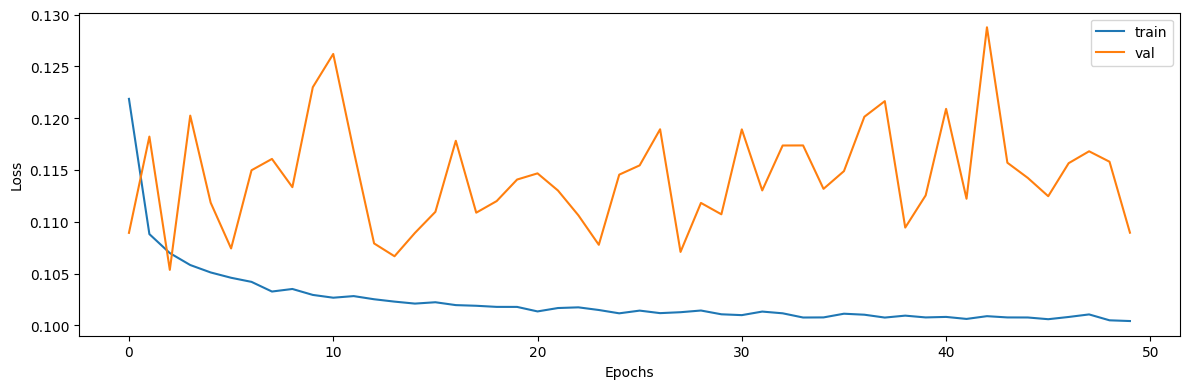

In [35]:
tf_visu_history.draw_learning_curves(history, showfig=True)

In [36]:
ypred = model.predict(test_generator)

 43/336 [==>...........................] - ETA: 0s 

2023-05-06 01:10:32.700023: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:32.715840: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:32.723001: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:32.796831: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:32.801274: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:32.803593: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:32.805064: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


336/336 [==============================] - 0s 1ms/step


2023-05-06 01:10:33.190237: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:33.191421: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:33.285846: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:33.307497: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:33.308514: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:33.315698: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-06 01:10:33.333525: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


In [192]:
# scale back predicted values to SIT
# ypred_sc = scaler_output.inverse_transform(ypred)

In [37]:
ytrue = test_gt

In [38]:
import matplotlib.pyplot as plt

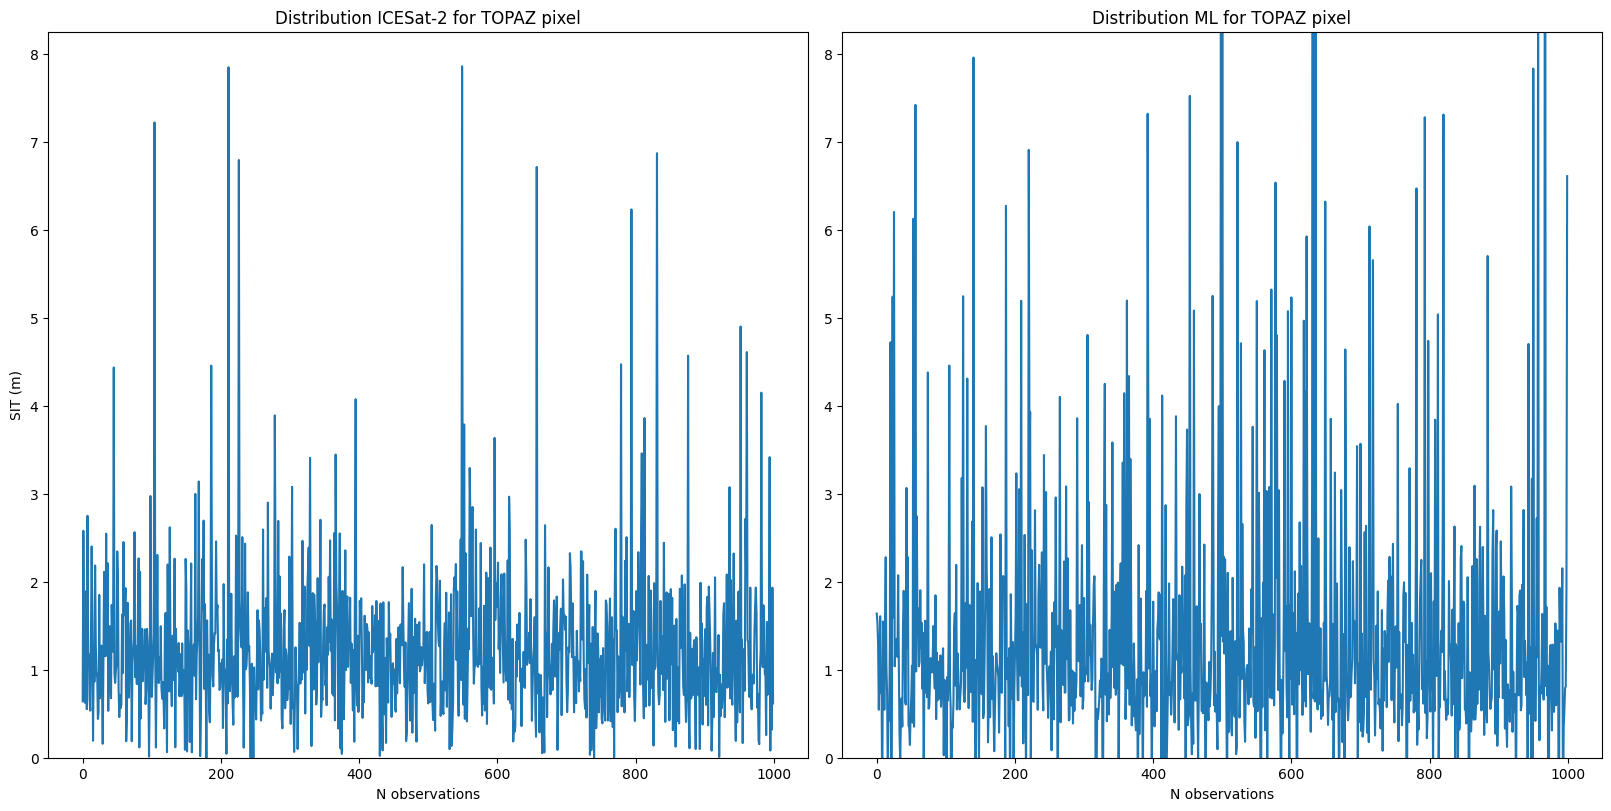

In [48]:
fig, ax = plt.subplots(ncols=2, constrained_layout=True, figsize=(8*2,8))

midx = 700 # 3000

ax[0].plot(ytrue[midx, :])
ax[0].set_title('Distribution ICESat-2 for TOPAZ pixel')
ax[0].set_xlabel('N observations')
ax[0].set_ylabel('SIT (m)')
ax[0].set_ylim(0, ax[0].get_ylim()[1])

ax[1].plot(ypred[midx, :])
ax[1].set_title('Distribution ML for TOPAZ pixel')
ax[1].set_xlabel('N observations');
ax[1].set_ylim(ax[0].get_ylim());

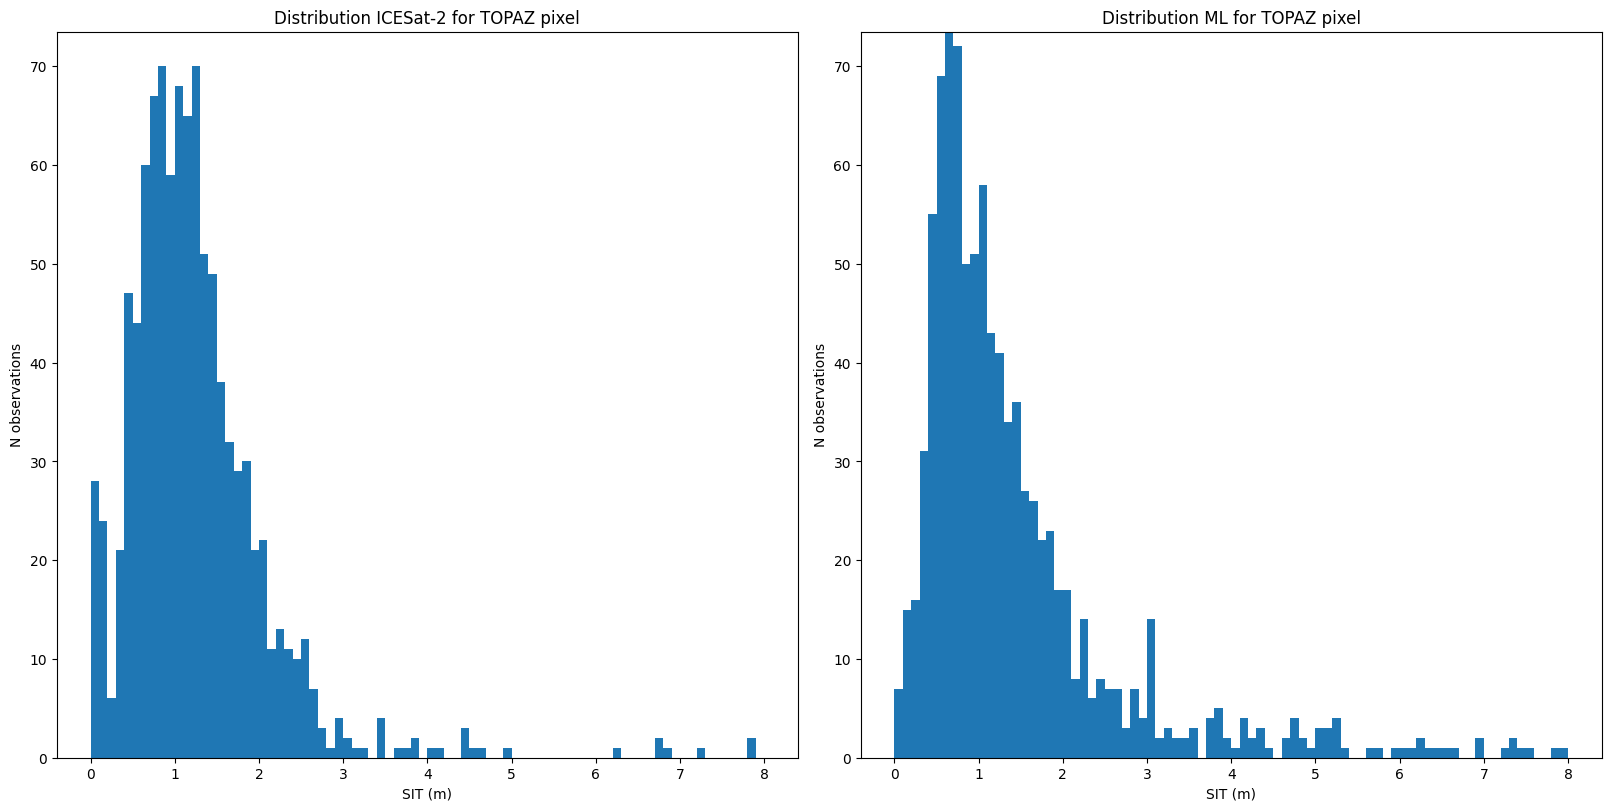

In [49]:
fig, ax = plt.subplots(ncols=2, constrained_layout=True, figsize=(8*2,8))

bin_width = 0.1
bins = np.arange(0,8+bin_width,bin_width)

ax[0].hist(ytrue[midx, :], bins=bins)
ax[0].set_title('Distribution ICESat-2 for TOPAZ pixel')
ax[0].set_ylabel('N observations')
ax[0].set_xlabel('SIT (m)')


ax[1].hist(ypred[midx, :], bins=bins)
ax[1].set_title('Distribution ML for TOPAZ pixel')
ax[1].set_ylabel('N observations')
ax[1].set_xlabel('SIT (m)');
ax[1].set_ylim(ax[0].get_ylim());


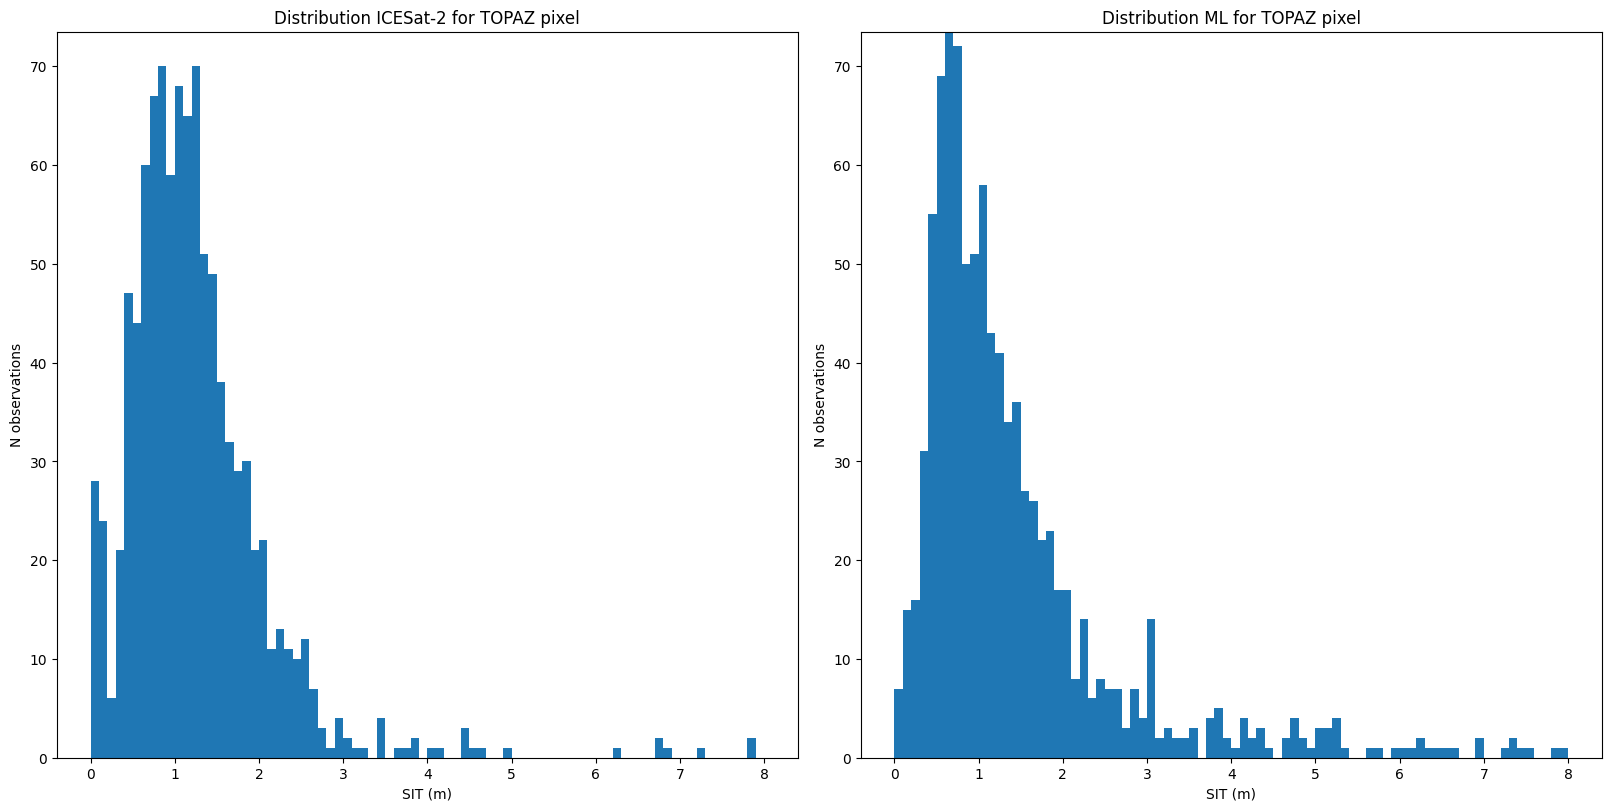

In [49]:
fig, ax = plt.subplots(ncols=2, constrained_layout=True, figsize=(8*2,8))

bins = np.array([0, 0.64, 1.39, 2.47, 4.57, 20])

ax[0].hist(ytrue[midx, :], bins=bins)
ax[0].set_title('Distribution ICESat-2 for TOPAZ pixel')
ax[0].set_ylabel('N observations')
ax[0].set_xlabel('SIT (m)')


ax[1].hist(ypred[midx, :], bins=bins)
ax[1].set_title('Distribution ML for TOPAZ pixel')
ax[1].set_ylabel('N observations')
ax[1].set_xlabel('SIT (m)');
ax[1].set_ylim(ax[0].get_ylim());


## ----------------------------------------------------------

In [123]:
# multiple prediction for 1 index
ypp = []

idx_test = 20
xt_lr = test_lr[idx_test:idx_test+1]

npred = 50
for n in range(npred):
    ypp.append(model.predict(xt_lr))

    
ypp = np.array(ypp).squeeze()
ypp = ypp.reshape((ypp.shape[0]*ypp.shape[1]))

1/1 [==============================] - 0s 14ms/step


2023-05-05 15:05:57.590193: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.598105: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.602712: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.609842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.613724: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.616362: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.629690: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.637332: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.641999: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57

1/1 [==============================] - 0s 14ms/step


2023-05-05 15:05:57.794539: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.802434: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.807061: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.814011: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.817922: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.820569: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.833936: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.841710: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57.846289: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:57

1/1 [==============================] - 0s 15ms/step


2023-05-05 15:05:57.998403: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.003066: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.009896: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.013747: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.016360: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.029662: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.037363: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.041927: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.048734: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58

1/1 [==============================] - 0s 14ms/step


2023-05-05 15:05:58.202450: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.207098: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.213952: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.217842: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.220477: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.234224: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.241961: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.246654: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.253682: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58

1/1 [==============================] - 0s 14ms/step


2023-05-05 15:05:58.404545: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.411315: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.415155: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.417772: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.430998: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.442996: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.447652: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.454637: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.458702: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58

1/1 [==============================] - 0s 14ms/step


2023-05-05 15:05:58.608699: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.615531: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.619359: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.621979: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.635765: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.643565: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.648134: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.654893: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.658715: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58

1/1 [==============================] - 0s 14ms/step


2023-05-05 15:05:58.814170: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.818460: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.821167: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.835680: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.843669: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.848449: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.855701: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.859816: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58.862499: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:58

1/1 [==============================] - 0s 15ms/step


2023-05-05 15:05:59.018107: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.020725: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.034073: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.041838: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.046440: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.053296: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.057119: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.059731: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.073378: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59

1/1 [==============================] - 0s 14ms/step


2023-05-05 15:05:59.221981: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.224661: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.238452: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.246368: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.251069: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.258008: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.261894: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.264534: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.278123: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59

1/1 [==============================] - 0s 15ms/step


2023-05-05 15:05:59.435494: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.443245: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.447920: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.454655: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.458482: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.461097: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.474600: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.482323: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59.486902: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-05-05 15:05:59

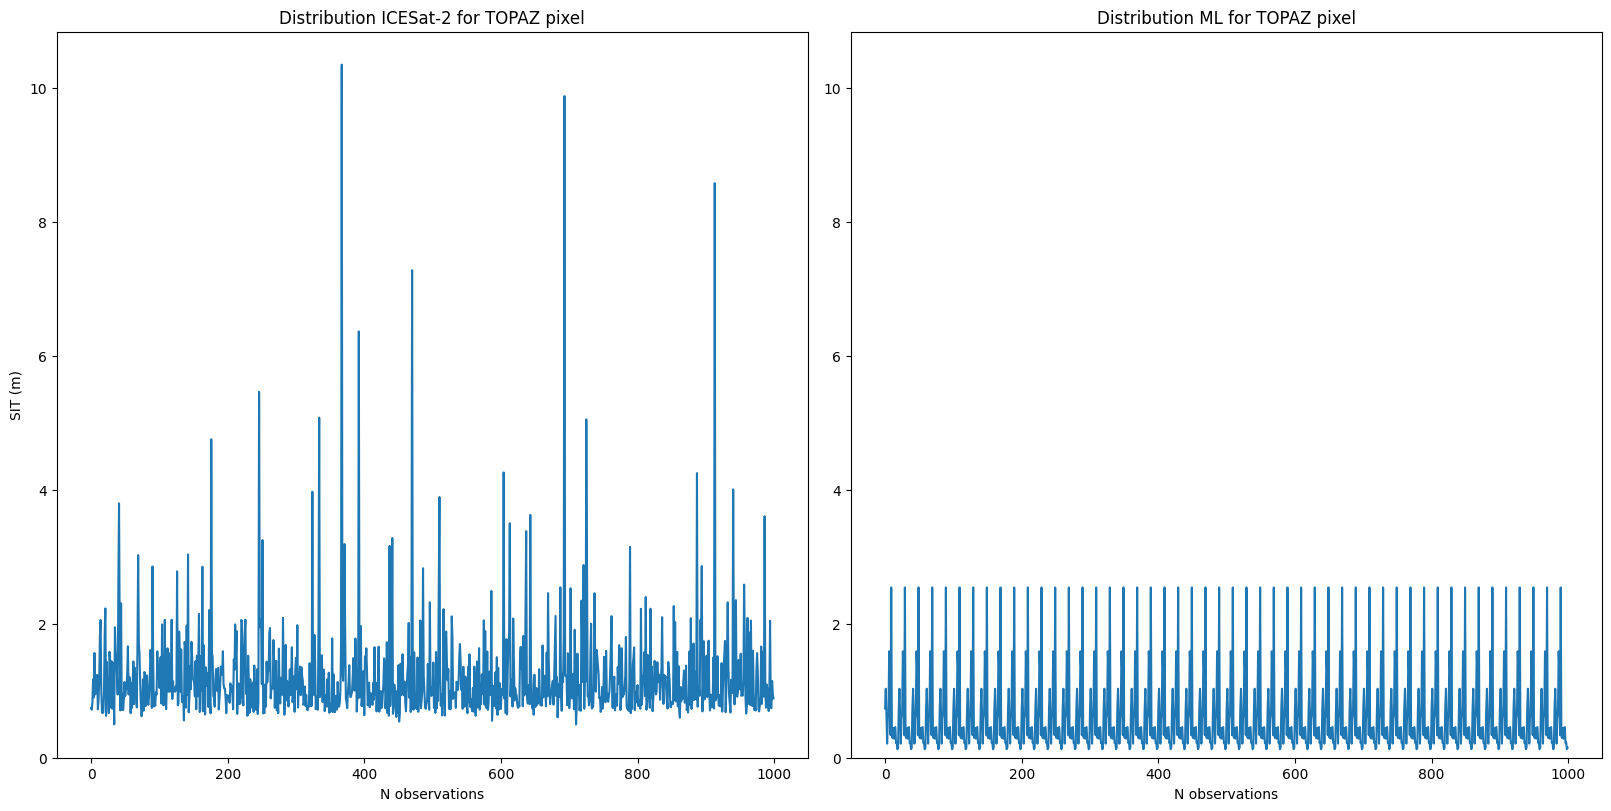

In [124]:
fig, ax = plt.subplots(ncols=2, constrained_layout=True, figsize=(8*2,8))

midx = 0 # 3000

ax[0].plot(y[val_split_idx+idx_test])
ax[0].set_title('Distribution ICESat-2 for TOPAZ pixel')
ax[0].set_xlabel('N observations')
ax[0].set_ylabel('SIT (m)')
ax[0].set_ylim(0, ax[0].get_ylim()[1])

ax[1].plot(ypp)
ax[1].set_title('Distribution ML for TOPAZ pixel')
ax[1].set_xlabel('N observations');
ax[1].set_ylim(ax[0].get_ylim());

# Loss function: developpment and tries

In [111]:
nval = 20  # number of points for CDF

In [112]:
# fake ypred
ypred = 2 * np.random.random_sample((nval,))

In [113]:
val = ytrue[midx, :]

In [114]:
def ecdf(a):
    '''returns x,y
    from
    https://stackoverflow.com/questions/24788200/calculate-the-cumulative-distribution-function-cdf-in-python
    '''
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

In [115]:
bins_val, cdf_val = ecdf(val[:nval])

In [116]:
bins_pred, cdf_pred = ecdf(ypred[:nval])

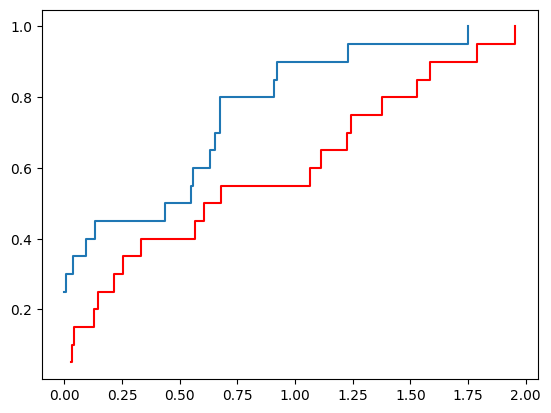

In [117]:
plt.plot(bins_val, cdf_val, drawstyle='steps-post')
plt.plot(bins_pred, cdf_pred, 'r', drawstyle='steps-post')

In [463]:
# project predicted curve on x axis of valid curve

In [118]:
def cdf_bins(a,bins):
    pdf, bin_edges = np.histogram(a, bins=bins, density=True)
    cdf = np.cumsum(pdf*np.diff(bin_edges))
    return cdf

In [119]:
bins_val_proj = np.concatenate((bins_val, [20]))  # add a MAX bin, to have same length of CDF

In [120]:
cdf_pp = cdf_bins(ypred[:nval], bins_val_proj)

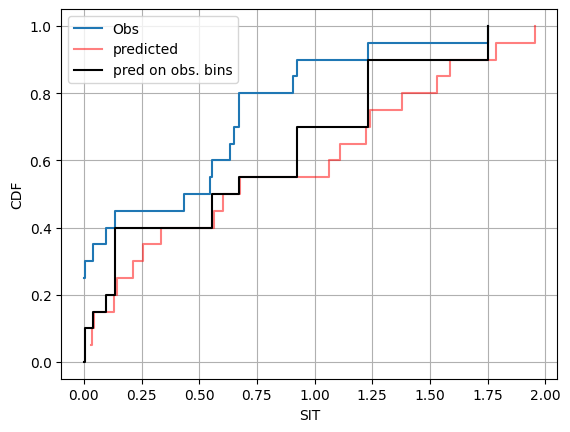

In [121]:
plt.plot(bins_val, cdf_val, drawstyle='steps-post', label='Obs')
plt.plot(bins_pred, cdf_pred, 'r', drawstyle='steps-post', alpha=0.5, label='predicted')
plt.plot(bins_val, cdf_pp, 'k', drawstyle='steps-post', label='pred on obs. bins')

# plt.fill(*pdiff.T, alpha=0.2)

plt.xlabel('SIT')
plt.ylabel('CDF')
plt.grid()
plt.legend();

In [468]:
# diff between curves

In [125]:
def compute_area(y1, y2, x):
    '''
    y1       :    cdf curve 1
    y2       :    cdf curve 2
    x        :    bins (similar for both curves)
    
    from 
    https://stackoverflow.com/questions/25439243/find-the-area-between-two-curves-plotted-in-matplotlib-fill-between-area
    '''
    z = y1 - y2
    dx = x[1:] - x[:-1]
    cross_test = np.sign(z[:-1] * z[1:])  # negative when curves cross

    x_intersect = x[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
    dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]

    areas_pos = abs(z[:-1] + z[1:]) * 0.5 * dx  # no intersection: signs of both z are same: add area of rectangle
    # intersection: add area of 2 triangles
    areas_neg = 0.5 * dx_intersect * abs(z[:-1]) + 0.5 * (dx - dx_intersect) * abs(z[1:])  

    areas = np.where(cross_test < 0, areas_neg, areas_pos)
    total_area = np.sum(areas)

    negatives = np.where(cross_test < 0)[0]
    positives = np.where(cross_test >= 0)[0]
    
    return total_area, negatives, positives, areas
    

In [126]:
area, neg, pos, areas = compute_area(cdf_val, cdf_pp, bins_val)

/tmp/ipykernel_4581/2028383057.py:14: RuntimeWarning: divide by zero encountered in true_divide
  x_intersect = x[:-1] - dx / (z[1:] - z[:-1]) * z[:-1]
/tmp/ipykernel_4581/2028383057.py:15: RuntimeWarning: divide by zero encountered in true_divide
  dx_intersect = - dx / (z[1:] - z[:-1]) * z[:-1]
/tmp/ipykernel_4581/2028383057.py:19: RuntimeWarning: invalid value encountered in add
  areas_neg = 0.5 * dx_intersect * abs(z[:-1]) + 0.5 * (dx - dx_intersect) * abs(z[1:])


In [128]:
areas.shape

(15,)

In [124]:
area

0.19927832005616705

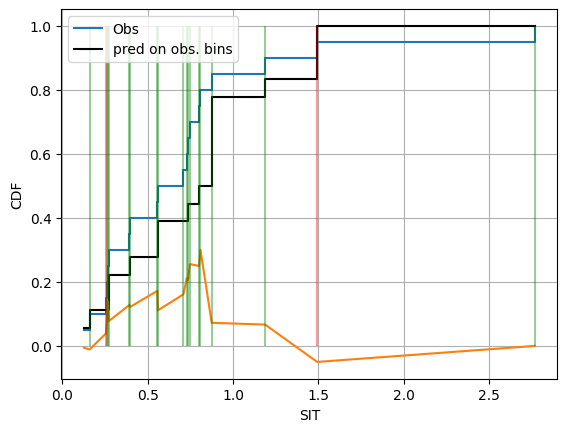

In [472]:
plt.plot(bins_val, cdf_val, drawstyle='steps-post', label='Obs')
plt.plot(bins_val, cdf_pp, 'k', drawstyle='steps-post', label='pred on obs. bins')

plt.plot(bins_val, cdf_val-cdf_pp)
plt.vlines(bins_val[pos+1], 0, 1, 'g', alpha=0.4)
plt.vlines(bins_val[neg+1], 0, 1, 'r', alpha=0.4)

plt.xlabel('SIT')
plt.ylabel('CDF')
plt.grid()
plt.legend();

^^^^^^^^^^^^

# Faire une fonction de coût a partir de ca

# ----------------------------------------------------------------------------------------

# Draft

In [8]:
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Dense, Conv1DTranspose, Reshape, Flatten
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Sequential

2023-05-02 15:18:33.984036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Generate some fake data
num_samples = 10000
num_features = 8
num_obs = 1000
lr_estimations = np.random.rand(num_samples, num_features)
# in_situ_measurements = np.random.rand(num_samples, num_features)
ground_truth_distributions = np.random.rand(num_samples, num_obs) # 100)

# Reshape the input data to be 2D with a single channel
lr_estimations = lr_estimations.reshape(num_samples, num_features, 1)
# in_situ_measurements = in_situ_measurements.reshape(num_samples, num_features, 1)

In [38]:
from tensorflow.keras.layers import Dense, Conv1D

def build_model(num_features, num_obs):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(None, num_features)))
    model.add(Flatten())
    model.add(Dense(num_obs, input_shape=(None,)))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_model_tg(num_features, num_ground_truth_distributions):  # , num_batch):
    # Define the input layer
#     inputs = Input(shape=(None, num_features, 1))
    inputs = Input(shape=(num_features,1))
    

    # Define the hidden layers
#    hidden1 = Dense(64, activation='relu')(inputs)
#    hidden2 = Dense(32, activation='relu')(hidden1)
#    hidden3 = Dense(16, activation='relu')(hidden2)
#     hidden4 = Dense(1)(hidden3)

    hidden1 = Conv1D(64,3, activation='relu')(inputs)
    hidden2 = Conv1D(128, 3, activation='relu')(hidden1)
    hidden3 = Conv1D(128*2, 3, activation='relu')(hidden2)

    print(hidden1.shape)
    flatten1 = Flatten()(hidden3)
    print(hidden1.shape)

    # Define the output layer
    outputs = Dense(num_ground_truth_distributions, activation='softmax')(flatten1)
    print('out: ', outputs.shape)

    # Define the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    return model

In [26]:
import numpy as np

# Generate some fake data
num_samples = 200 # 1000
num_features = 12
num_obs = 20
lr_estimations = np.random.rand(num_samples, num_features)
# in_situ_measurements = np.random.rand(num_samples, num_features)
ground_truth_distributions = np.random.rand(num_samples, num_obs) # 100)

# Reshape the input data to be 2D with a single channel
lr_estimations = lr_estimations.reshape(num_samples, num_features, 1)
# in_situ_measurements = in_situ_measurements.reshape(num_samples, num_features, 1)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Dense, Conv1DTranspose, Reshape
from tensorflow.keras.utils import Sequence


# Define the model architecture
def build_model(num_features, num_obs):
    input_lr = Input(shape=(num_features, 1))
    x = Conv1DTranspose(32, 3, padding='same', activation='relu')(input_lr)
    x = Conv1DTranspose(16, 3, padding='same', activation='relu')(x)
    x = Conv1DTranspose(1, 3, padding='same', activation='sigmoid')(x)
#     output = Reshape((-1,))(x)
    output = Dense(num_obs, activation='softmax')(x)
    print(output.shape)
    model = Model(inputs=input_lr, outputs=output)
    model.compile(loss='mse', optimizer='adam')
    return model

In [40]:
from tensorflow.keras.layers import Dense

def build_model(num_features, num_ground_truth_distributions):  # , num_batch):
    # Define the input layer
    inputs = Input(shape=(None, num_features)) # , 1))

    # Define the hidden layers
    hidden1 = Dense(64, activation='relu')(inputs)
    hidden2 = Dense(32, activation='relu')(hidden1)
    hidden3 = Dense(16, activation='relu')(hidden2)
#     hidden4 = Dense(1)(hidden3)
    
    
    hidden3 = Flatten()(hidden3)
    # Define the output layer
    outputs = Dense(num_ground_truth_distributions, activation='softmax')(hidden3)
#     outputs = Flatten(input_shape=(None, None, num_features, num_ground_truth_distributions))(outputs)
    print(outputs.shape)

    # Define the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    return model


In [38]:
# Define the data loader
class DataGenerator(Sequence):
    
    def __init__(self, lr_estimations, ground_truth_distributions, batch_size=32, shuffle=True):
        self.lr_estimations = lr_estimations
        self.ground_truth_distributions = ground_truth_distributions
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.lr_estimations) / self.batch_size))

    def __getitem__(self, idx):
        indexes = self.indexes[idx*self.batch_size:(idx+1)*self.batch_size]
#         X_lr = np.expand_dims(self.lr_estimations[indexes], axis=-1)
        X_lr = self.lr_estimations[indexes]
        
        y = self.ground_truth_distributions[indexes]
#         y = np.expand_dims(self.ground_truth_distributions[indexes], axis=-1)
        print('X: ', X_lr.shape)
        print('y:', y.shape)
        return X_lr, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.lr_estimations))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

In [42]:
import tensorflow as tf

In [44]:
tf.test.gpu_device_name()

2023-04-25 22:00:19.600691: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /device:GPU:0 with 63996 MB memory:  -> device: 0, name: , pci bus id: 0000:c1:00.0
2023-04-25 22:00:19.600770: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /device:GPU:1 with 63996 MB memory:  -> device: 1, name: , pci bus id: 0000:c6:00.0
2023-04-25 22:00:19.600827: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /device:GPU:2 with 63996 MB memory:  -> device: 2, name: , pci bus id: 0000:c9:00.0
2023-04-25 22:00:19.600877: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /device:GPU:3 with 63996 MB memory:  -> device: 3, name: , pci bus id: 0000:ce:00.0
2023-04-25 22:00:19.600924: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /device:GPU:4 with 63996 MB memory:  -> device: 4, name: , pci bus id: 0000:d1:00.0
2023-04-25 22:00:19.600971: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1

'/device:GPU:0'

613] Created device /device:GPU:6 with 63996 MB memory:  -> device: 6, name: , pci bus id: 0000:d9:00.0
2023-04-25 22:00:19.601062: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /device:GPU:7 with 63996 MB memory:  -> device: 7, name: , pci bus id: 0000:de:00.0


In [45]:
tf.config.set_visible_devices([], 'GPU')

RuntimeError: Visible devices cannot be modified after being initialized

In [49]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [50]:

# Split the data into training and validation sets
split_idx = int(0.8 * num_samples)
train_lr = lr_estimations[:split_idx]
train_gt = ground_truth_distributions[:split_idx]
val_lr = lr_estimations[split_idx:]
val_gt = ground_truth_distributions[split_idx:]

# Create a data generator for the training set
batch_size = 32
train_generator = DataGenerator(train_lr, train_gt, batch_size=batch_size)

# Create a data generator for the validation set
val_generator = DataGenerator(val_lr, val_gt, batch_size=batch_size)

# Build the model
model = build_model(num_features, num_obs)

# Train the model
epochs = 2  # 10
model.fit(train_generator, epochs=epochs, validation_data=val_generator)

(None, None, 12, 20)
X:  (32, 12, 1)
y: (32, 20)
Epoch 1/2


2023-04-25 22:01:23.072963: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-04-25 22:01:23.086298: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-04-25 22:01:23.092174: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


X:  (32, 12, 1)
y: (32, 20)
X:  (32, 12, 1)
y: (32, 20)


2023-04-25 22:01:23.578462: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-04-25 22:01:23.585056: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-04-25 22:01:23.587649: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-04-25 22:01:23.589313: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-04-25 22:01:23.607711: E tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:289] bitcode module is required by this HLO module but was not found at ./opencl.bc
2023-04-25 22:01:23.607899: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:446 : INTERNAL: bitcode module not found at ./opencl.bc
2023-04-25 22:01:23.621416: E tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:289] bitcode module is required by this HLO module but was not found at ./opencl.bc
2023-04-25 22:01:23.621575: 

InternalError: Graph execution error:

Detected at node 'StatefulPartitionedCall_6' defined at (most recent call last):
    File "/opt/cray/pe/python/3.9.12.1/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/cray/pe/python/3.9.12.1/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/opt/cray/pe/python/3.9.12.1/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/opt/cray/pe/python/3.9.12.1/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/opt/cray/pe/python/3.9.12.1/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_39021/3719611976.py", line 20, in <module>
      model.fit(train_generator, epochs=epochs, validation_data=val_generator)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_6'
bitcode module not found at ./opencl.bc
	 [[{{node StatefulPartitionedCall_6}}]] [Op:__inference_train_function_18131]

In [3]:
from tensorflow.keras.layers import Flatten, Dense, Activation, Reshape, Concatenate
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU
from tensorflow.keras.models import Model


# # Define the generator model
# def build_generator():
#     input_lr = Input(shape=(None, None, 1))
#     input_in_situ = Input(shape=(None, None, 1))

#     # Encode the low-resolution input
#     x = Conv2D(64, (3, 3), padding='same')(input_lr)
#     x = LeakyReLU(alpha=0.2)(x)

#     # Combine the low-resolution input and in-situ measurements
#     combined = Concatenate()([x])  # , input_in_situ])

#     # Decode the combined input to generate the output distribution
#     x = Conv2D(64, (3, 3), padding='same')(combined)
#     x = LeakyReLU(alpha=0.2)(x)
#     x = Conv2D(64, (3, 3), padding='same')(x)
#     x = LeakyReLU(alpha=0.2)(x)
#     x = Conv2D(1, (3, 3), padding='same')(x)
#     output_hr = Activation('softmax')(x)

#     # Reshape the output to be a 1D probability distribution
#     output_hr = Reshape((-1,))(output_hr)

#     generator = Model(inputs=[input_lr], outputs=output_hr)  # , input_in_situ

#     return generator

2023-04-25 21:25:54.746546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Compile the generator
generator = build_generator()
generator.compile(loss='mse', optimizer='adam')

# data_loader = DataGenerator(lr_estimations, in_situ_measurements, ground_truth_distributions)
data_loader = DataGenerator(lr_estimations, ground_truth_distributions)


# Train the generator
num_epochs=2
for epoch in range(num_epochs):
    for batch_index, (lr_estimation_batch, ground_truth_batch) in enumerate(data_loader):  # in_situ_batch, 
        # Train the generator
        generator_loss = generator.train_on_batch([lr_estimation_batch], ground_truth_batch)
#         generator_loss = generator.train_on_batch([lr_estimation_batch, in_situ_batch], ground_truth_batch)
        

        # Print the loss value
        print('Epoch {} Batch {}: G loss = {}'.format(epoch, batch_index, generator_loss))

2023-04-25 21:17:00.312148: E tensorflow/compiler/xla/stream_executor/rocm/rocm_driver.cc:302] failed call to hipInit: HIP_ERROR_InvalidDevice
2023-04-25 21:17:00.312192: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:112] retrieving ROCM diagnostic information for host: uan01
2023-04-25 21:17:00.312204: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:119] hostname: uan01
2023-04-25 21:17:00.312292: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:142] librocm reported version is: NOT_FOUND: was unable to find librocm.so DSO loaded into this program
2023-04-25 21:17:00.312304: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:146] kernel reported version is: UNIMPLEMENTED: kernel reported driver version not implemented
2023-04-25 21:17:00.312570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instru

ValueError: in user code:

    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/keras/losses.py", line 1500, in mean_squared_error
        return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 10 and 100 for '{{node mean_squared_error/SquaredDifference}} = SquaredDifference[T=DT_FLOAT](model/reshape/Reshape, IteratorGetNext:1)' with input shapes: [32,10], [32,100].


In [231]:
def build_model_tg2(num_features, num_ground_truth_distributions):  # , num_batch):
    # Define the input layer
    inputs = Input(shape=(num_features,1))
    

    # Define the hidden layers
#    hidden1 = Dense(64, activation='relu')(inputs)
#    hidden2 = Dense(32, activation='relu')(hidden1)
#    hidden3 = Dense(16, activation='relu')(hidden2)
#     hidden4 = Dense(1)(hidden3)

#     hidden1 = Conv1D(64,3, activation='relu')(inputs)
#     hidden2 = Conv1D(128, 3, activation='relu')(hidden1)
#     hidden3 = Conv1D(5, 1, activation='relu')(hidden2)

#     print(hidden1.shape)
    flatten1 = Flatten()(inputs)
#     print(hidden1.shape)

    # Define the output layer
    outputs = Dense(num_ground_truth_distributions, activation='softmax')(flatten1)
    print('out: ', outputs.shape)

    # Define the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    return model

In [291]:
from keras.layers import Input, Conv1D, Flatten, Dense, concatenate, Dropout
from keras.models import Model

def build_model_3(num_features, num_obs):
    inputs = Input(shape=(num_features, 1))
    
    # First convolutional layer
    conv1 = Conv1D(64, 3, activation='relu', padding='same')(inputs)
    
    # Second convolutional layer
    conv2 = Conv1D(128, 3, activation='relu', padding='same')(conv1)
    
    # Third convolutional layer
    conv3 = Conv1D(256, 5, activation='relu', padding='same')(conv2)
    
    # Flatten the output from the convolutional layers
    flat = Flatten()(conv3)
    
    
    # Add a Dropout layer
    dropout1 = Dropout(0.5)(flat)
    
    # Concatenate the flattened output with a Dense layer
#     dense = Dense(256, activation='relu')(flat)
    
    # Output layer
    output = Dense(num_obs, activation='linear')(dropout1)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse')
    
    return model


In [11]:
from keras.layers import Input, Flatten, Dense, concatenate, Dropout
from keras.models import Model

def build_model_4(num_features, num_obs):
    inputs = Input(shape=(num_features, 1))
    
    dense1 = Dense(64, activation='linear')(inputs)
        
    # Flatten the output from the convolutional layers
    flat = Flatten()(dense1)
        
    # Add a Dropout layer
    dropout1 = Dropout(0.5)(flat)
    
    # Output layer
    output = Dense(num_obs, activation='linear')(dropout1)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse')
    
    return model


In [76]:
data_loader